# Analysing Tartu Smart Bike usage data 2019-2021
Aleksander Tamm, Martin Vendelin, Otto Jõeleht

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
data2019 = pd.read_csv("2019.csv", sep=',', header=0)
data2020 = pd.read_csv("2020.csv", sep=',', header=0)
data2021 = pd.read_csv("2021.csv", sep=',', header=0)
dokid= ...



In [3]:
#andmete puhastus valedest dokkidest ja lühikestest sõitudest

data2019 = data2019.drop(data2019[(data2019.startstationname == 'Warehouse') | (data2019.endstationname == 'Warehouse')].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == 'Lauluväljak') | (data2019.endstationname == 'Lauluväljak')].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == 'SPARK Demo') | (data2019.endstationname == 'SPARK Demo')].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == 'Töökoda') | (data2019.endstationname == 'Töökoda')].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == "Tour d'ÖÖ") | (data2019.endstationname == "Tour d'ÖÖ")].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == "-- Määramata --") | (data2019.endstationname == "-- Määramata --")].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == "Metallica parkla") | (data2019.endstationname == "Metallica parkla")].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == "Undetermined") | (data2019.endstationname == "Undetermined")].index)
data2019 = data2019.drop(data2019[data2019['length'] < 0.05].index)
data2019 = data2019.drop(data2019[data2019.length == 0].index)

data2019['first3IdNumber'] = data2019['first3IdNumber'].fillna("NaN")
# Määra sünniaasta andmetüübiks 'sõne'.
data2019['yearOfBirth'] = data2019['yearOfBirth'].astype(str)
# Eemalda sünniaasta lõpust '.0'.
data2019['yearOfBirth'] = data2019['yearOfBirth'].str[:-2]
data2019['yearOfBirth'] = data2019['yearOfBirth'].replace('n', '000')
# Eemalda ID-kaardi numbrid, mille pikkus on lühem kui 3.
data2019 = data2019.drop(data2019[data2019['first3IdNumber'].str.len() != 3].index)
# Eemalda ID-kaardi numbrid, mis ei kuulu massiivi kaardi esimese numbri põhjal.
synNr = ['N','1','2','3','4','5','6']
data2019 = data2019.drop(data2019[~data2019['first3IdNumber'].str[0].isin(synNr)].index)
# Eemalda üksik kirje
data2019 = data2019.drop(data2019[data2019['first3IdNumber'] == '3ü1'].index)

data2019['unlocktime'] = data2019.apply(lambda row: row.unlockedat.strip() +"/"+ row.unlockedattime.strip(), axis=1)
data2019['locktime'] = data2019.apply(lambda row: row.lockedat.strip() +"/"+ row.lockedattime.strip(), axis=1)
data2019.loc[((data2019['first3IdNumber'].str[0] == '1') | (data2019['first3IdNumber'].str[0] == '2')),'yearOfBirth'] = ('18' + data2019['first3IdNumber'].str[1:])
data2019.loc[((data2019['first3IdNumber'].str[0] == '3') | (data2019['first3IdNumber'].str[0] == '4')),'yearOfBirth'] = ('19' + data2019['first3IdNumber'].str[1:])
data2019.loc[((data2019['first3IdNumber'].str[0] == '5') | (data2019['first3IdNumber'].str[0] == '6')),'yearOfBirth'] = ('20' + data2019['first3IdNumber'].str[1:])
data2019[['yearOfBirth', 'first3IdNumber']].loc[(data2019['yearOfBirth'].str[2:4] != data2019['first3IdNumber'].str[1:]) & ((data2019['yearOfBirth'].str[:3] != '000') & (data2019['first3IdNumber'] != 'NaN'))]


data2020 = data2020.drop(data2020[(data2020.startstationname == '-- Määramata --') | (data2020.endstationname == '-- Määramata --')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'Rahu 8') | (data2020.endstationname == 'Rahu 8')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'SPARK Demo') | (data2020.endstationname == 'SPARK Demo')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'Töökoda') | (data2020.endstationname == 'Töökoda')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'Undetermined') | (data2020.endstationname == 'Undetermined')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'Ihaste Päev') | (data2020.endstationname == 'Ihaste Päev')].index)
data2020 = data2020.drop(data2020[data2020['length'] < 0.05].index)
data2020 = data2020.drop(data2020[data2020.length == 0].index)

data2020['first3IdNumber'] = data2020['first3IdNumber'].fillna("NaN")
# Määra sünniaasta andmetüübiks 'sõne'.
data2020['yearOfBirth'] = data2020['yearOfBirth'].astype(str)
# Eemalda sünniaasta lõpust '.0'.
data2020['yearOfBirth'] = data2020['yearOfBirth'].str[:-2]
data2020['yearOfBirth'] = data2020['yearOfBirth'].replace('n', '000')
# Eemalda ID-kaardi numbrid, mille pikkus on lühem kui 3.
data2020 = data2020.drop(data2020[data2020['first3IdNumber'].str.len() != 3].index)
# Eemalda ID-kaardi numbrid, mis ei kuulu massiivi kaardi esimese numbri põhjal.
synNr = ['N','1','2','3','4','5','6']
data2020 = data2020.drop(data2020[~data2020['first3IdNumber'].str[0].isin(synNr)].index)
# Eemalda üksik kirje
data2020 = data2020.drop(data2020[data2020['first3IdNumber'] == '3ü1'].index)

data2020['unlocktime'] = data2020.apply(lambda row: row.unlockedat.strip() +"/"+ row.unlockedattime.strip(), axis=1)
data2020['locktime'] = data2020.apply(lambda row: row.lockedat.strip() +"/"+ row.lockedattime.strip(), axis=1)

data2020.loc[((data2020['first3IdNumber'].str[0] == '1') | (data2020['first3IdNumber'].str[0] == '2')),'yearOfBirth'] = ('18' + data2020['first3IdNumber'].str[1:])
data2020.loc[((data2020['first3IdNumber'].str[0] == '3') | (data2020['first3IdNumber'].str[0] == '4')),'yearOfBirth'] = ('19' + data2020['first3IdNumber'].str[1:])
data2020.loc[((data2020['first3IdNumber'].str[0] == '5') | (data2020['first3IdNumber'].str[0] == '6')),'yearOfBirth'] = ('20' + data2020['first3IdNumber'].str[1:])

data2020[['yearOfBirth', 'first3IdNumber']].loc[(data2020['yearOfBirth'].str[2:4] != data2020['first3IdNumber'].str[1:]) & ((data2020['yearOfBirth'].str[:3] != '000') & (data2020['first3IdNumber'] != 'NaN'))]


data2021 = data2021.drop(data2021[(data2021.startstationname == 'SPARK Demo') | (data2021.endstationname == 'SPARK Demo')].index)
data2021 = data2021.drop(data2021[(data2021.startstationname == '-- Määramata --') | (data2021.endstationname == '-- Määramata --')].index)
data2021 = data2021.drop(data2021[(data2021.startstationname == 'Töökoda') | (data2021.endstationname == 'Töökoda')].index)
data2021 = data2021.drop(data2021[(data2021.startstationname == 'Undetermined') | (data2021.endstationname == 'Undetermined')].index)
data2021 = data2021.drop(data2021[data2021['length'] < 0.05].index)
data2021 = data2021.drop(data2021[data2021.length == 0].index)

data2021['first3IdNumber'] = data2021['first3IdNumber'].fillna("NaN")
# Määra sünniaasta andmetüübiks 'sõne'.
data2021['yearOfBirth'] = data2021['yearOfBirth'].astype(str)
# Eemalda sünniaasta lõpust '.0'.
data2021['yearOfBirth'] = data2021['yearOfBirth'].str[:-2]
data2021['yearOfBirth'] = data2021['yearOfBirth'].replace('n', '000')
# Eemalda ID-kaardi numbrid, mille pikkus on lühem kui 3.
data2021 = data2021.drop(data2021[data2021['first3IdNumber'].str.len() != 3].index)
# Eemalda ID-kaardi numbrid, mis ei kuulu massiivi kaardi esimese numbri põhjal.
synNr = ['N','1','2','3','4','5','6']
data2021 = data2021.drop(data2021[~data2021['first3IdNumber'].str[0].isin(synNr)].index)
# Eemalda üksik kirje
data2021 = data2021.drop(data2021[data2021['first3IdNumber'] == '3ü1'].index)

data2021['unlocktime'] = data2021.apply(lambda row: row.unlockedat.strip() +"/"+ row.unlockedattime.strip(), axis=1)
data2021['locktime'] = data2021.apply(lambda row: row.lockedat.strip() +"/"+ row.lockedattime.strip(), axis=1)

data2021.loc[((data2021['first3IdNumber'].str[0] == '1') | (data2021['first3IdNumber'].str[0] == '2')),'yearOfBirth'] = ('18' + data2021['first3IdNumber'].str[1:])
data2021.loc[((data2021['first3IdNumber'].str[0] == '3') | (data2021['first3IdNumber'].str[0] == '4')),'yearOfBirth'] = ('19' + data2021['first3IdNumber'].str[1:])
data2021.loc[((data2021['first3IdNumber'].str[0] == '5') | (data2021['first3IdNumber'].str[0] == '6')),'yearOfBirth'] = ('20' + data2021['first3IdNumber'].str[1:])

data2021[['yearOfBirth', 'first3IdNumber']].loc[(data2021['yearOfBirth'].str[2:4] != data2021['first3IdNumber'].str[1:]) & ((data2021['yearOfBirth'].str[:3] != '000') & (data2021['first3IdNumber'] != 'NaN'))]




,yearOfBirth,first3IdNumber


In [4]:
#andmed 1te tabelisse

kogudata= data2019.append(data2020.append(data2021))
#kogudata['unlocktime'] = kogudata.apply(lambda row: row.unlockedat.strip() +"/"+ row.unlockedattime.strip(), axis=1)
#kogudata['locktime'] = kogudata.apply(lambda row: row.lockedat.strip() +"/"+ row.lockedattime.strip(), axis=1)
kogudata=kogudata.drop(columns=["startstationserialnumber","endstationserialnumber","unlockedat","unlockedattime","lockedat","lockedattime"])
kogudata['unlocktime']  = pd.to_datetime(kogudata['unlocktime'] ,errors='coerce', format="%Y-%m-%d/%H:%M:%S")
kogudata['locktime']  = pd.to_datetime(kogudata['locktime'] ,errors='coerce', format="%Y-%m-%d/%H:%M:%S")

In [5]:
print(kogudata.shape)

#kogudata['first3IdNumber'] = kogudata['first3IdNumber'].fillna("NaN")
# Määra sünniaasta andmetüübiks 'sõne'.
#kogudata['yearOfBirth'] = kogudata['yearOfBirth'].astype(str)
# Eemalda sünniaasta lõpust '.0'.
#kogudata['yearOfBirth'] = kogudata['yearOfBirth'].str[:-2]
#kogudata['yearOfBirth'] = kogudata['yearOfBirth'].replace('n', '000')
# Eemalda ID-kaardi numbrid, mille pikkus on lühem kui 3.
#kogudata = kogudata.drop(kogudata[kogudata['first3IdNumber'].str.len() != 3].index)
# Eemalda ID-kaardi numbrid, mis ei kuulu massiivi kaardi esimese numbri põhjal.
#synNr = ['N','1','2','3','4','5','6']
#kogudata = kogudata.drop(kogudata[~kogudata['first3IdNumber'].str[0].isin(synNr)].index)
# Eemalda üksik kirje
#kogudata = kogudata.drop(kogudata[kogudata['first3IdNumber'] == '3ü1'].index)
# ID-kaardi põhjal sünniaasta genereerimine

#print(kogudata)
#kogudata.loc[((kogudata['first3IdNumber'].str[0] == '1') | (kogudata['first3IdNumber'].str[0] == '2')),'yearOfBirth'] = ('18' + kogudata['first3IdNumber'].str[1:])
#kogudata.loc[((kogudata['first3IdNumber'].str[0] == '3') | (kogudata['first3IdNumber'].str[0] == '4')),'yearOfBirth'] = ('19' + kogudata['first3IdNumber'].str[1:])
#kogudata.loc[((kogudata['first3IdNumber'].str[0] == '5') | (kogudata['first3IdNumber'].str[0] == '6')),'yearOfBirth'] = ('20' + kogudata['first3IdNumber'].str[1:])

#kogudata[['yearOfBirth', 'first3IdNumber']].loc[(kogudata['yearOfBirth'].str[2:4] != kogudata['first3IdNumber'].str[1:]) & ((kogudata['yearOfBirth'].str[:3] != '000') & (kogudata['first3IdNumber'] != 'NaN'))]
#keskmine kiirus
import statistics
x=statistics.mean(kogudata["length"]/((kogudata["locktime"]-kogudata["unlocktime"]).dt.total_seconds() / 3600))
print(x)



#kiirete sõitude välistamine
kogudata = kogudata.loc[(kogudata["length"]/((kogudata["locktime"]-kogudata["unlocktime"]).dt.total_seconds() / 3600))<35]

#x[['yearOfBirth', 'first3IdNumber']].loc[(x['yearOfBirth'].str[2:4] != x['first3IdNumber'].str[1:]) & ((x['yearOfBirth'].str[:3] != '000') & (x['first3IdNumber'] != 'NaN'))]
print(kogudata.shape)
kogudata

(1587223, 8)
nan
(1575619, 8)


,cyclenumber,startstationname,endstationname,length,yearOfBirth,first3IdNumber,unlocktime,locktime
3,2421.0,Pirogovi plats,Pirogovi plats,0.96,000,NaN,2019-06-03 12:47:10,2019-06-03 12:53:28
5,2290.0,Pirogovi plats,Lossi,1.53,1995,395,2019-06-03 12:55:24,2019-06-03 13:06:37
8,2416.0,Pirogovi plats,Pirogovi plats,18.62,000,NaN,2019-06-03 12:59:21,2019-06-03 14:55:37
9,2421.0,Pirogovi plats,Pirogovi plats,17.10,000,NaN,2019-06-03 13:14:54,2019-06-03 14:56:29
10,2290.0,Lossi,Tulbi,2.04,1981,381,2019-06-03 13:18:52,2019-06-03 13:26:50
...,...,...,...,...,...,...,...,...
84999,2514.0,Kalda tee,Kalda tee,6.82,2002,602,2021-04-30 23:52:51,2021-05-01 00:28:09
85000,2384.0,Ringtee,ERM,6.69,1973,473,2021-04-30 23:53:50,2021-05-01 00:15:46
85001,2227.0,Kalda tee,Põhja puiestee,1.22,1940,340,2021-04-30 23:53:53,2021-04-30 23:58:42
85002,2537.0,Põhja puiestee,Sõpruse sild,2.35,000,NaN,2021-04-30 23:54:30,2021-05-01 00:02:03


In [6]:
#total distance
kogudata["length"].sum()

4422775.2

In [7]:
#gender df
dataWithGender=kogudata.loc[kogudata["first3IdNumber"] != "NaN"]
male=["1","3","5"]
dataWithGender["male"]=dataWithGender.apply(lambda row: 1 if row.first3IdNumber[0] in male else 0, axis=1)


<ipython-input-7-1f984e5e5f8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithGender["male"]=dataWithGender.apply(lambda row: 1 if row.first3IdNumber[0] in male else 0, axis=1)


male
0    506604
1    704202
Name: length, dtype: int64

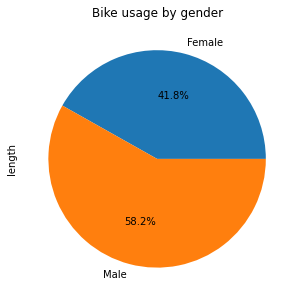

In [8]:
x= dataWithGender.groupby("male")["length"].count()
plot = x.plot.pie(y='male', figsize=(5, 5), labels=["Female", "Male"],autopct='%1.1f%%')
plot.set_title("Bike usage by gender")
x


In [9]:

from collections import Counter
from  itertools import combinations

#sõiduAL = kogudata[1:3]
sõiduAL = kogudata[['startstationname','endstationname']]

c = Counter([y for x in sõiduAL.values for y in combinations(x, 2)])
df = pd.DataFrame({'Pair': list(c.keys()), 'Rides': list(c.values())})
n = 10
L = Counter([y for x in sõiduAL.values for y in combinations(x, 2)]).most_common(n)

df = pd.DataFrame(L, columns=['Pair', 'Rides'])
#print (df.sort_values('Qty', ascending=False).head(50))
#print(df["Qty"].sum())
print(df)

                                 Pair  Rides
0    (Annelinna kiir, Annelinna kiir)   6529
1                  (Uueturu, Uueturu)   5596
2  (Annelinna keskus, Annelinna kiir)   3847
3                    (Ihaste, Ihaste)   3801
4              (Uueturu, Vabadussild)   3721
5  (Annelinna kiir, Annelinna keskus)   3578
6                (Veeriku, Kannikese)   3439
7           (Pirogovi plats, Uueturu)   3371
8           (Uueturu, Pirogovi plats)   3230
9              (Vabadussild, Uueturu)   3218


{'0-18': 65900, '19-25': 382285, '26-30': 124310, '31-40': 169938, '41-50': 98754, '51-65': 70287, '66+': 104218}


<BarContainer object of 7 artists>

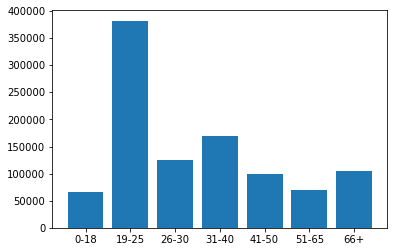

In [10]:

# remove incorrect birth years, remaining 1921-2003 
kogudata = kogudata.drop(kogudata[((kogudata['yearOfBirth'].astype(int) < 1921) | (2003 < kogudata['yearOfBirth'].astype(int))) & (kogudata['yearOfBirth'] != "000")].index)
# test
kogudata['yearOfBirth'].loc[(kogudata['yearOfBirth'].astype(int) >= 2000) & (kogudata['yearOfBirth'].astype(int) <= 2100) & (kogudata['yearOfBirth'] != "000")].unique()

vanused = {"0-18":0,"19-25":0,"26-30":0,"31-40":0,"41-50":0,"51-65":0,"66+":0}
for index, row in kogudata.iterrows():
    vanus = 2021 - int(row['yearOfBirth'])
    if(vanus != 2021):
        if (vanus <= 18):
            vanused["0-18"] = vanused["0-18"] + 1
        elif (18 < vanus <= 25):
            vanused["19-25"] = vanused["19-25"] + 1
        elif (26 < vanus <= 30):
            vanused["26-30"] = vanused["26-30"] + 1
        elif (31 < vanus <= 40):
            vanused["31-40"] = vanused["31-40"] + 1
        elif (41 < vanus <= 50):
            vanused["41-50"] = vanused["41-50"] + 1
        elif (50 < vanus <= 65):
            vanused["51-65"] = vanused["51-65"] + 1
        else:
            vanused["66+"] = vanused["66+"] + 1

keysVanused = vanused.keys()
valuesVanused = vanused.values()
print(vanused)
plt.bar(keysVanused, valuesVanused)

In [11]:
dataWithGenderAge=dataWithGender.drop(dataWithGender[((dataWithGender['yearOfBirth'].astype(int) < 1921) | (2003 < dataWithGender['yearOfBirth'].astype(int))) & (dataWithGender['yearOfBirth'] != "000")].index)


In [12]:
print(dataWithGenderAge.shape)
print(dataWithGender.shape)
dataWithGenderAge
genderAge=dataWithGenderAge[["yearOfBirth","male"]]
genderAge

(981772, 9)
(1210806, 9)


,yearOfBirth,male
5,1995,1
10,1981,1
11,1982,1
18,2002,1
19,2002,1
...,...,...
84997,1999,0
84999,2002,0
85000,1973,0
85001,1940,1


In [13]:
vanusedSooga = {"0-18":[0,0],"19-25":[0,0],"26-30":[0,0],"31-40":[0,0],"41-50":[0,0],"51-65":[0,0],"66+":[0,0]}
for index, row in genderAge.iterrows():
    vanus = 2021 - int(row['yearOfBirth'])
    male=row["male"]==1
    if(vanus != 2021):
        if (vanus <= 18):
            if male:
                vanusedSooga["0-18"][0] = vanusedSooga["0-18"][0] + 1
            else:
                vanusedSooga["0-18"][1] = vanusedSooga["0-18"][1] + 1
        elif (18 < vanus <= 25):
            if male:
                vanusedSooga["19-25"][0] = vanusedSooga["19-25"][0] + 1
            else:
                vanusedSooga["19-25"][1] = vanusedSooga["19-25"][1] + 1
        elif (26 < vanus <= 30):
            if male:
                vanusedSooga["26-30"][0] = vanusedSooga["26-30"][0] + 1
            else:
                vanusedSooga["26-30"][1] = vanusedSooga["26-30"][1] + 1
        elif (31 < vanus <= 40):
            if male:
                vanusedSooga["31-40"][0] = vanusedSooga["31-40"][0] + 1
            else:
                vanusedSooga["31-40"][1] = vanusedSooga["31-40"][1] + 1
 
        elif (41 < vanus <= 50):
            if male:
                vanusedSooga["41-50"][0] = vanusedSooga["41-50"][0] + 1
            else:
                vanusedSooga["41-50"][1] = vanusedSooga["41-50"][1] + 1
        elif (50 < vanus <= 65):
            if male:
                vanusedSooga["51-65"][0] = vanusedSooga["51-65"][0] + 1
            else:
                vanusedSooga["51-65"][1] = vanusedSooga["51-65"][1] + 1
        else:
            if male:
                vanusedSooga["66+"][0] = vanusedSooga["66+"][0] + 1
            else:
                vanusedSooga["66+"][1] = vanusedSooga["66+"][1] + 1
          

vanusedSoogaKeys = vanusedSooga.keys()
vanusedSoogaValues = vanusedSooga.values()

In [14]:
x_male=[]
x_female=[]
for key in vanusedSoogaKeys:
    x_male.append(vanusedSooga[key][0])
    x_female.append(vanusedSooga[key][1])

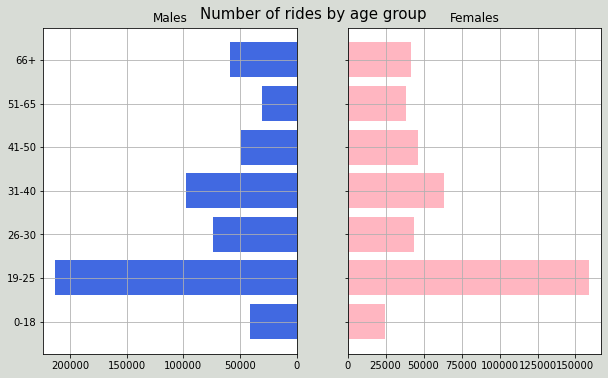

In [15]:
#define x and y limits
y = range(0, len(vanusedSooga))


#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Number of rides by age group", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=vanusedSoogaKeys)
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()